In [1]:
import pandas as pd
from src.visualization.plots import plot_language_distribution, plot_rating_series, plot_piechart_teams, plot_number_reviews_series, plot_keywords

# Project Showcase

This notebook intends to showcase the main results of the project by showing the final dataset and the resulting plots

This assumes the code has been run prior and the keywords have alredy been extracted as well as the similarity between reviews and teams already calculated

In [2]:
df = pd.read_csv(f'../data/final/keywords_data.csv', encoding="utf-8")
df['created_date'] = pd.to_datetime(df['created_date'], utc=True)
columns_interest = ['text','language','keyword_1', 'keyword_2', 'keyword_3', 'commercial', 'legal', 'product', 'related_team']

In [3]:
resumed_df = df[columns_interest]

We can now check how the final data looks like. 
We have preserved the original data layout (one reiew per row) but the review text has been processed.
* The title has been concated to the review content in order to have just one text column. 
* We decided to go for 3 keywords per review, and thus 3 different columns have been created containing each of th extracted terms
* Each team has a new column on the dataset containing the pertinence score (cosine similarity) for the review and the business unit
* The last column simply shows which team the review has been assigned to (the one with highest score)


In [4]:
resumed_df.head(10)

,text,language,keyword_1,keyword_2,keyword_3,commercial,legal,product,related_team
0,Horrible no response robotic,en,response,horrible,response robotic,0.401227,0.480256,0.481394,product
1,Trustpilot is the one and only you can trust a...,en,others,one,share thoughts,0.354044,0.415453,0.400214,legal
2,Gran ayuda para conocer las opiniones de los u...,es,opiniones,ayuda,servicios empresa,0.374503,0.384707,0.386214,product
3,Meget nem og overskuelig hjemmeside.,da,hjemmeside,overskuelig,overskuelig hjemmeside,0.272538,0.248382,0.361625,product
4,Betrouwbaar en geeft zekerheid Voordat ik een ...,nl,check eerst,reviews webshops,zeer tevreden,0.403162,0.397842,0.417822,product
5,Godt tilfreds ingen klager,da,godt,klager,tilfreds,0.356873,0.350683,0.343371,commercial
6,Servizio molto professionale consegne rapide,it,rapide,molto,professionale consegne,0.312335,0.339925,0.362868,product
7,"Excellent This is one trusted site, that I use...",en,one trusted,first class,site use,0.472217,0.506643,0.523868,product
8,Fantastic service from Eduardo. He chased me ...,en,managers,ensure got,timeframe love,0.454221,0.423291,0.522958,product
9,"Helpful, exllent, superb",en,exllent,superb,helpful,0.346955,0.415208,0.391397,legal


We can check the reviews in english for better understanding

In [5]:
resumed_df[resumed_df.language=='en'].head(10)

,text,language,keyword_1,keyword_2,keyword_3,commercial,legal,product,related_team
0,Horrible no response robotic,en,response,horrible,response robotic,0.401227,0.480256,0.481394,product
1,Trustpilot is the one and only you can trust a...,en,others,one,share thoughts,0.354044,0.415453,0.400214,legal
7,"Excellent This is one trusted site, that I use...",en,one trusted,first class,site use,0.472217,0.506643,0.523868,product
8,Fantastic service from Eduardo. He chased me ...,en,managers,ensure got,timeframe love,0.454221,0.423291,0.522958,product
9,"Helpful, exllent, superb",en,exllent,superb,helpful,0.346955,0.415208,0.391397,legal
10,Great service,en,great,service,great service,0.476341,0.436831,0.469196,commercial
12,"Trustpilot was very easy to follow, anyone can...",en,without,anyone,trustpilot easy,0.317537,0.297612,0.434894,product
14,I've been referring to Trustpilot for some tim...,en,suppliers goods,helpful recently,trustpilot effect,0.510998,0.471066,0.491166,commercial
16,Pro!\n☆ ☆ ☆ ☆ ☆ ☆\n star star star star st...,en,pro,thumbs_up,star smiling_face_with_smiling_eyes,0.380858,0.412614,0.390816,legal
17,Trustpilot is a great place to come and see wh...,en,definitely,gift cards,companies rated,0.472698,0.421252,0.511803,product


## Language distribution 
Now we plot the language distribution of the reviews on the log scale for better visualization.
It is clear that some languages are barely represented in the dataset, imposing challenges to the analysis with traditional NLP methods like TfIdf

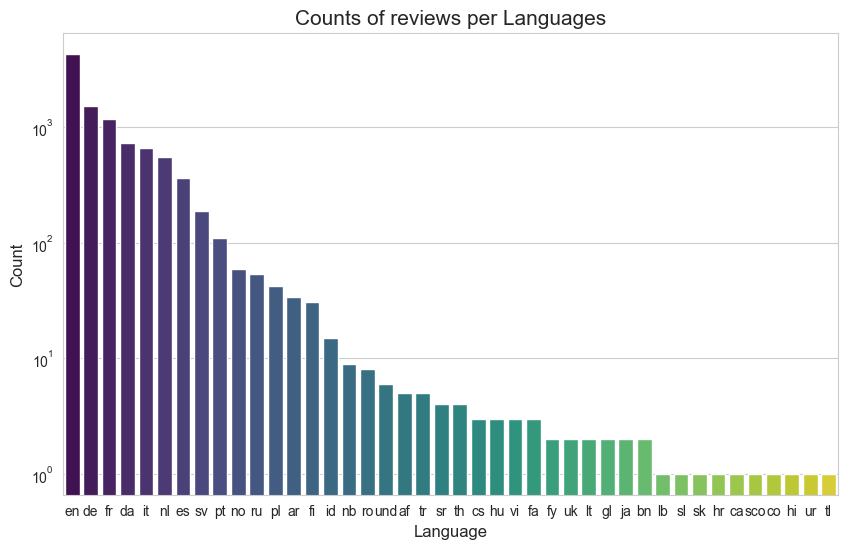

In [6]:
plot_language_distribution(df)

We filter by a specific time window now

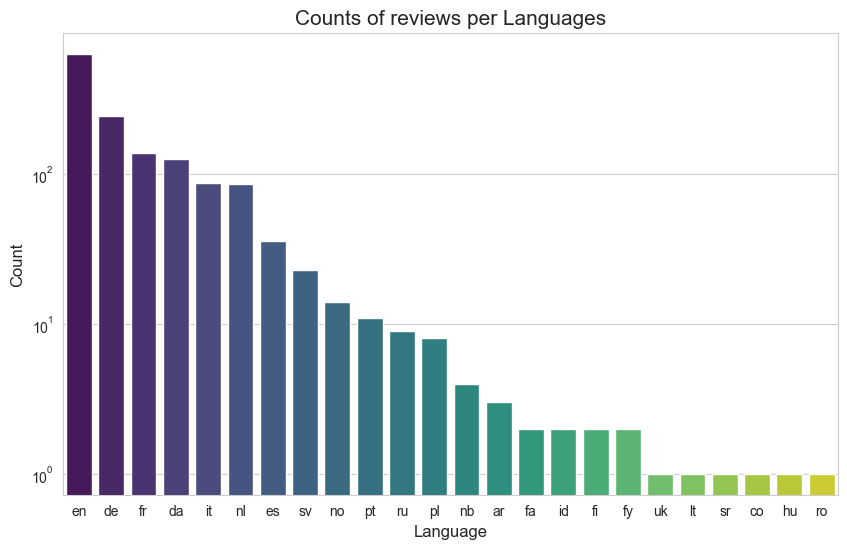

In [7]:
plot_language_distribution(df, target_month=12, target_year=2021)

## Rating series
Let's now check the average rating the reviewers gave to Trustpilot in the last weeks. 
This plot shows the aberage review score as well as a CI

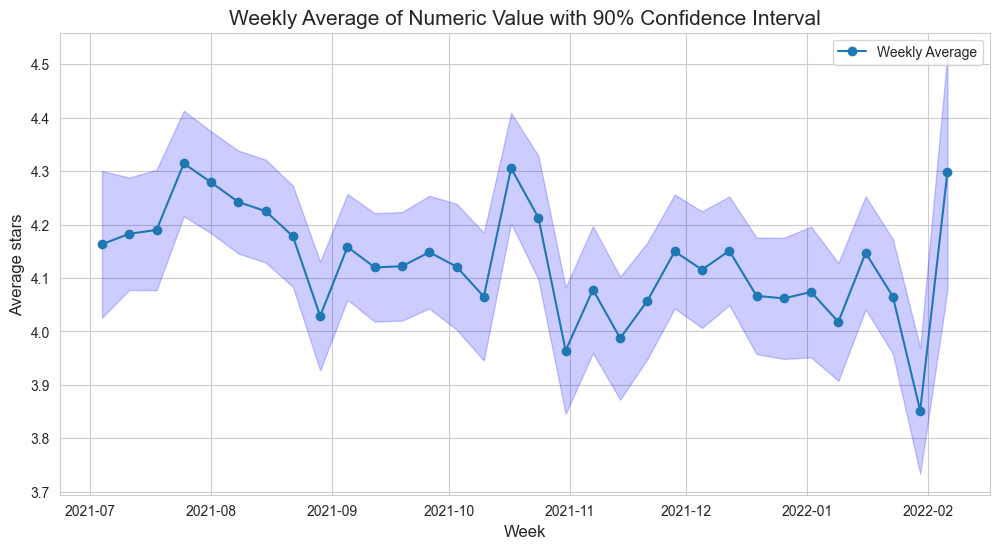

In [8]:
plot_rating_series(df)

## Piechart of team review assignment
It is importanto to know how many reviews have been alocated to each team

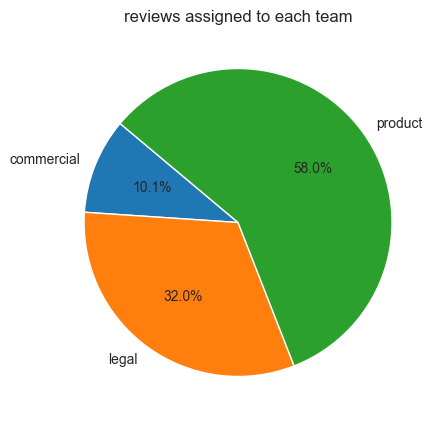

In [9]:
plot_piechart_teams(df)

## Team specific plots

We want to now focus on the information for specific teams. 
The following plots were conceived in order to convey important information obtained from the keyword analysis to the specific business units

In [10]:
teams = set(df['related_team'].values)

First, lets see the average rating but for the reviews assigned to the specific teams

### Rating series for each team

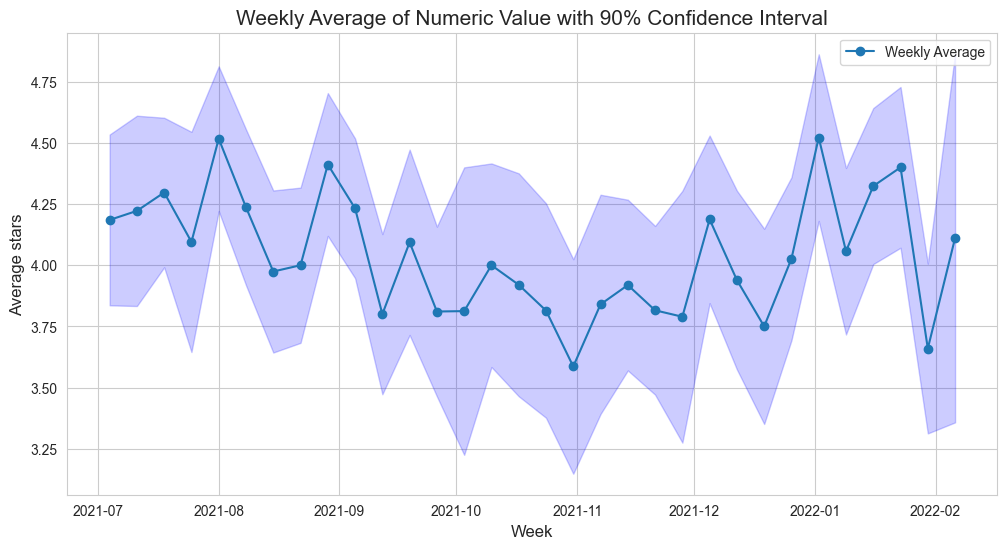

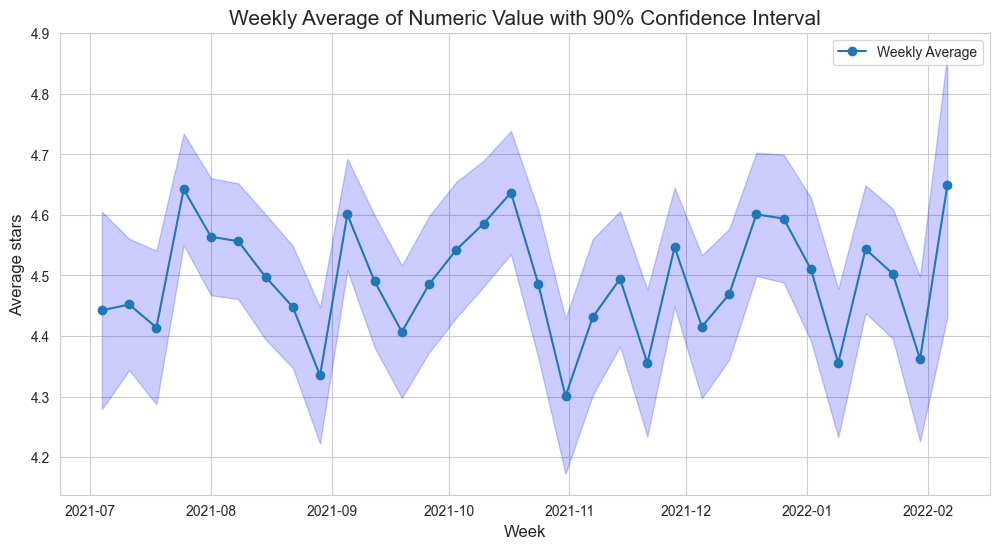

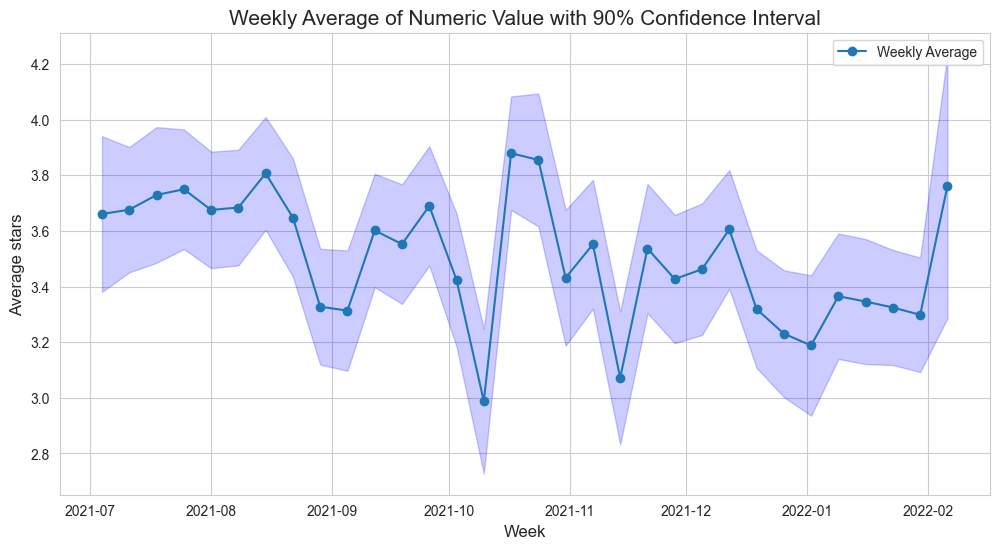

In [11]:
for team in teams:
    plot_rating_series(df, team=team)

### Series of review counts per team
For the number of reviews per week, a simple quality control approach was taken
* Each dot is the review count per week
* The horizontal lines represent the mean and the three standard deviation intervals
* If there is a downwards or upwards consecutive trend, the dots are painted repectively
* dots outside the bounderies are also highlighted

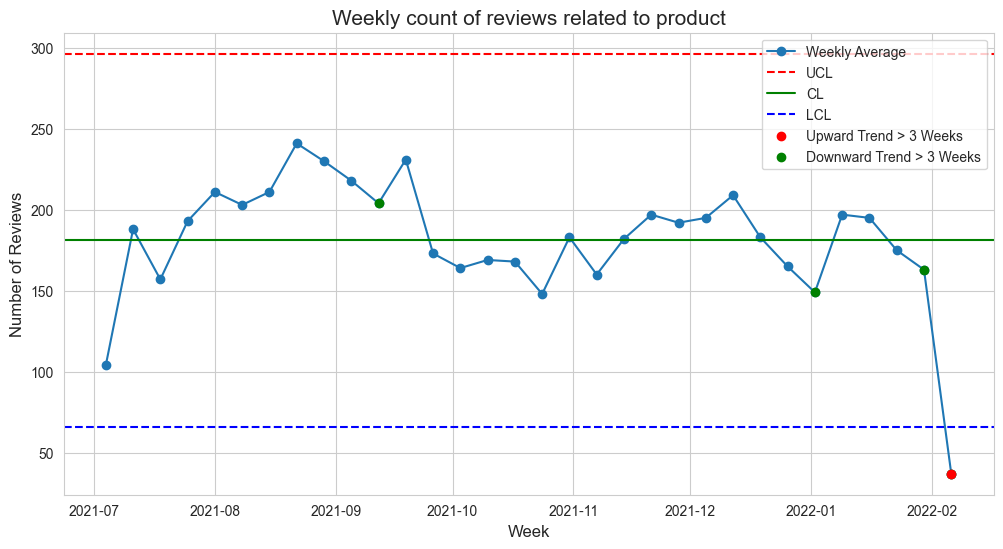

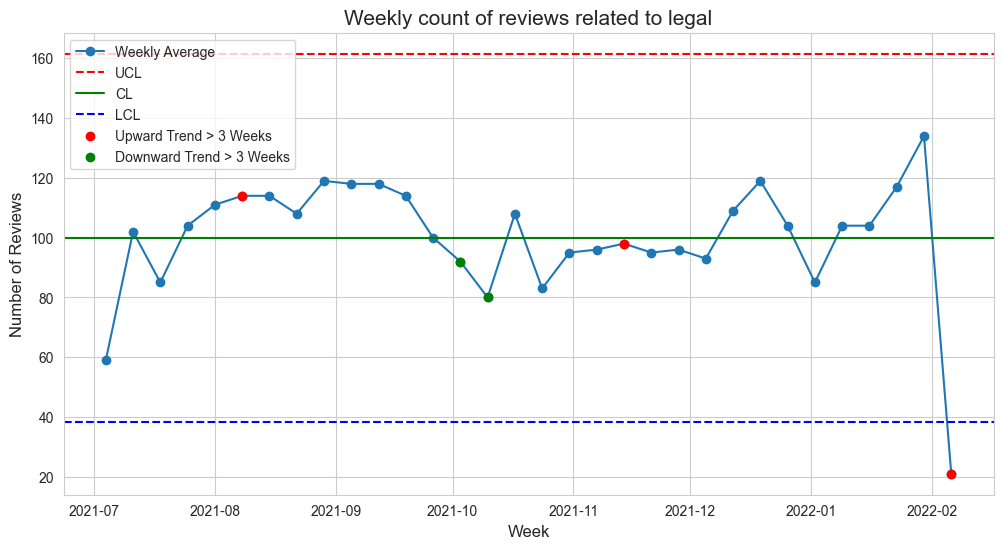

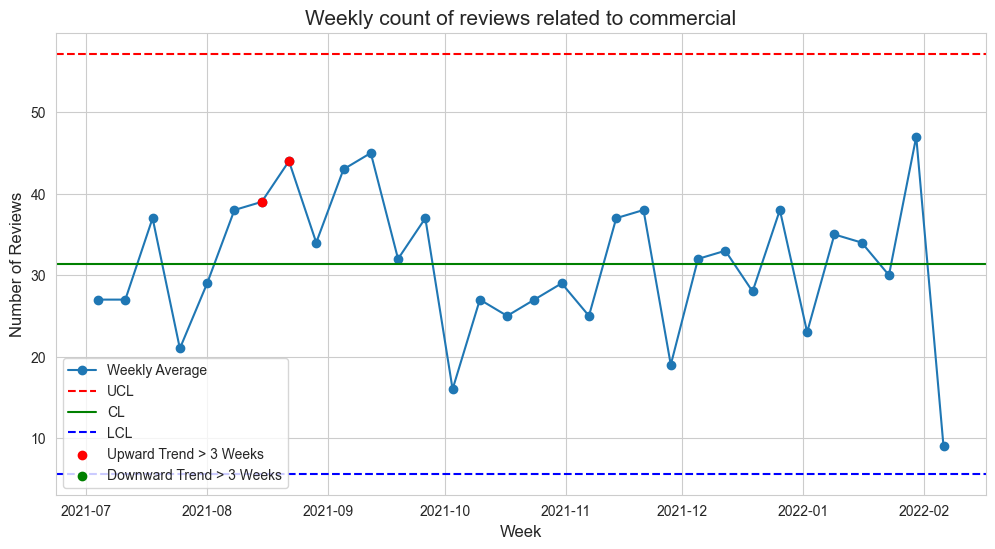

In [18]:
for team in teams:
    plot_number_reviews_series(df, team=team)

### Keyword scatterplot
For each team we created a plot of keywords
* the horizontal axis represents the  degree of pertinence to the team (cosine similarity)
* The vertical axis represents the average rating of the specific term (with jitter)
* They are colored based on the rating (stars)
* the plot can be filtered on time windows (MM/DD/YYY) as well as on specific months and year
* the intended language should also be chosen

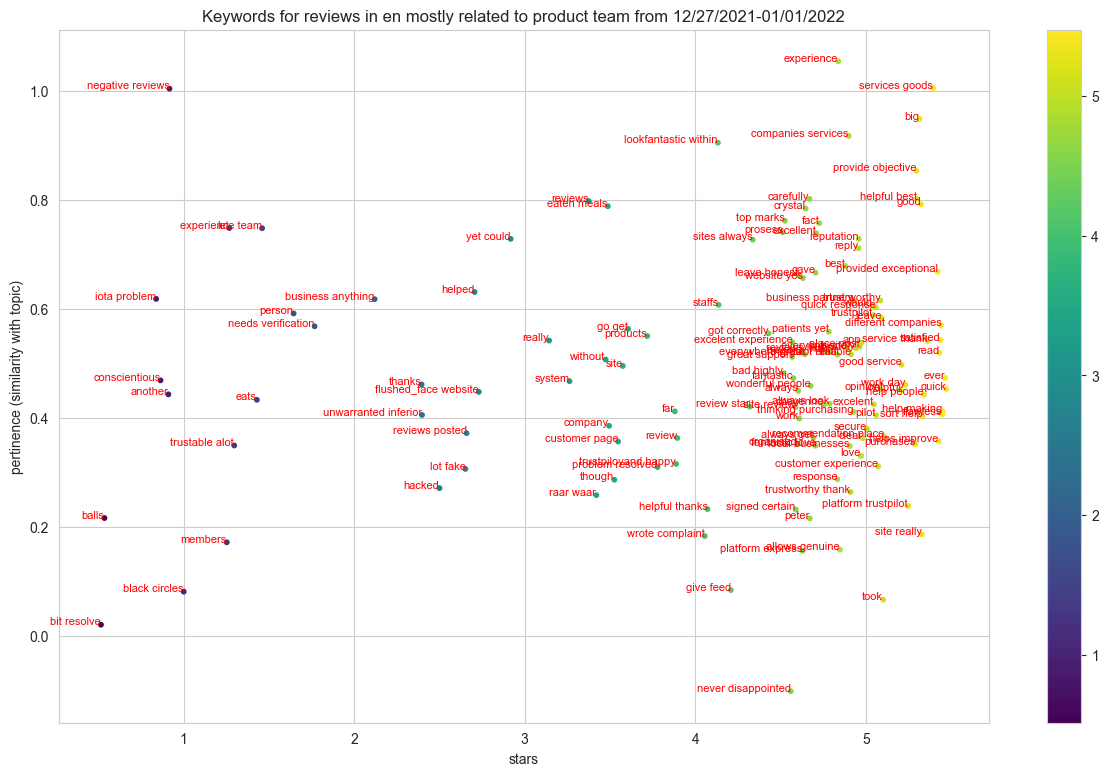

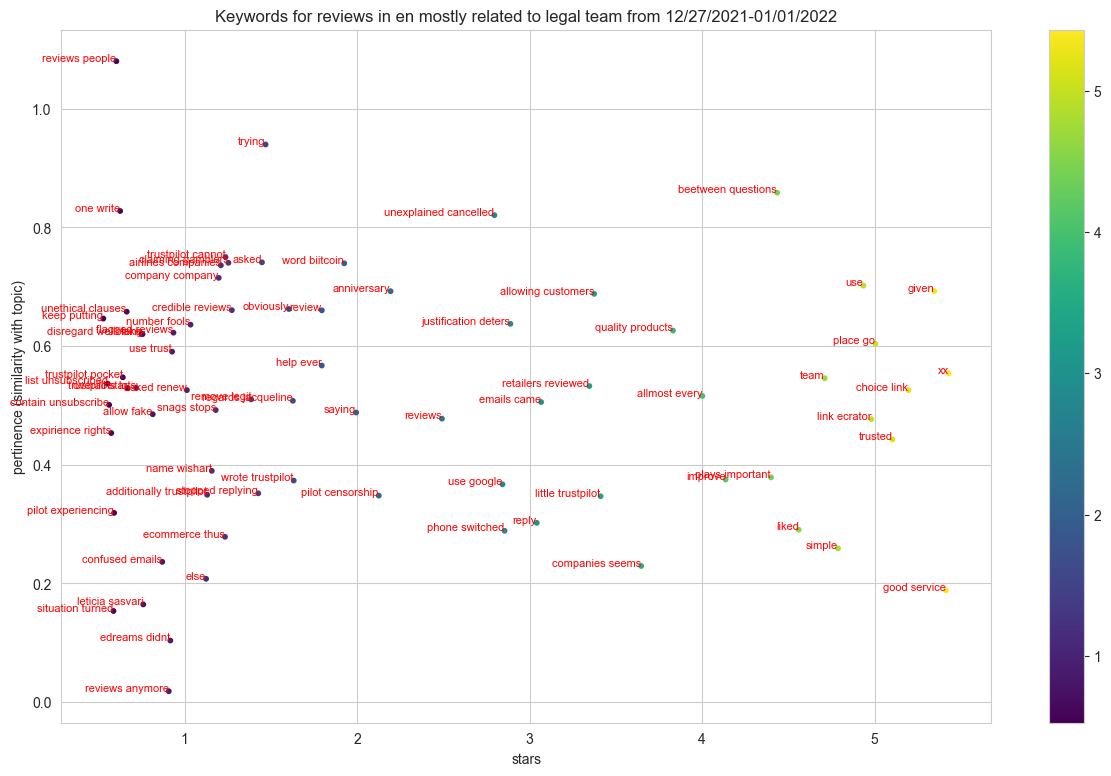

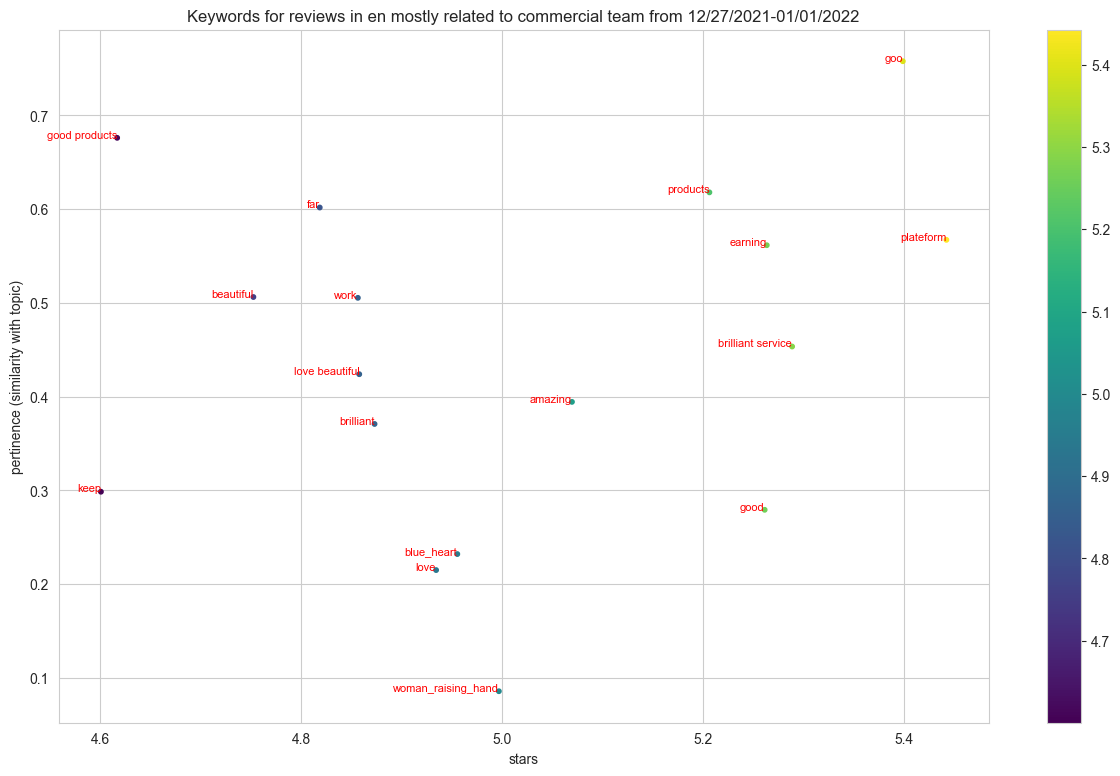

In [21]:
for team in teams:
    plot_keywords(df, team=team, target_language='en', start_date='12/27/2021', end_date='01/01/2022')